In [162]:
import pandas as pd
from scipy.stats import norm
import numpy as np
from datetime import date

In [163]:
data = pd.read_csv('quinzena.csv', sep=';')

In [164]:
data.head()

,Symbol,Position,Type,Lots,Open time,Open price,Close time,Close price,Profit,Net profit,Rollover,S/L,T/P,Commission,Swap,Margin
0,OIL.WTI,979403098,Buy Limit,0.01,31.05.2023 20:16:30,67.75000,31.05.2023 22:48:02,68.13000,3.80,3.80,0,67.48000,68.12000,0,0.0,10.16
1,OIL.WTI,979179314,Sell,0.01,31.05.2023 14:02:25,68.60000,31.05.2023 15:29:59,68.10000,5.00,5.00,0,69.31000,67.30000,0,0.0,10.29
2,EURUSD,979207602,Buy,0.01,31.05.2023 14:31:34,1.06489,31.05.2023 15:07:02,1.06680,1.91,1.91,0,1.06342,1.06766,0,0.0,5.32
3,EURUSD,979207602,Buy,0.01,31.05.2023 14:31:34,1.06489,31.05.2023 14:47:44,1.06676,1.87,1.87,0,1.06342,1.06766,0,0.0,5.33
4,USDJPY,978567171,Sell Stop,0.02,31.05.2023 08:30:47,139.83500,31.05.2023 11:00:04,140.32000,-6.92,-6.92,0,140.08500,139.41400,0,0.0,10.00


In [165]:
data.dtypes

Symbol          object
Position         int64
Type            object
Lots           float64
Open time       object
Open price     float64
Close time      object
Close price    float64
Profit         float64
Net profit     float64
Rollover         int64
S/L            float64
T/P            float64
Commission       int64
Swap           float64
Margin         float64
dtype: object

## Transformando Open time e Close time em datetime:

In [166]:
data['Open time'] = pd.to_datetime(data['Open time'])
data['Close time'] = pd.to_datetime(data['Close time'])

In [167]:
data.dtypes

Symbol                 object
Position                int64
Type                   object
Lots                  float64
Open time      datetime64[ns]
Open price            float64
Close time     datetime64[ns]
Close price           float64
Profit                float64
Net profit            float64
Rollover                int64
S/L                   float64
T/P                   float64
Commission              int64
Swap                  float64
Margin                float64
dtype: object

## Gerando a variável Tipo com base em Compra ou Venda:

In [168]:
data['Tipo'] = data['Type'].apply(lambda x: 'Compra' if x in 'Buy Stop' else 'Venda')
data.head()

,Symbol,Position,Type,Lots,Open time,Open price,Close time,Close price,Profit,Net profit,Rollover,S/L,T/P,Commission,Swap,Margin,Tipo
0,OIL.WTI,979403098,Buy Limit,0.01,2023-05-31 20:16:30,67.75000,2023-05-31 22:48:02,68.13000,3.80,3.80,0,67.48000,68.12000,0,0.0,10.16,Venda
1,OIL.WTI,979179314,Sell,0.01,2023-05-31 14:02:25,68.60000,2023-05-31 15:29:59,68.10000,5.00,5.00,0,69.31000,67.30000,0,0.0,10.29,Venda
2,EURUSD,979207602,Buy,0.01,2023-05-31 14:31:34,1.06489,2023-05-31 15:07:02,1.06680,1.91,1.91,0,1.06342,1.06766,0,0.0,5.32,Compra
3,EURUSD,979207602,Buy,0.01,2023-05-31 14:31:34,1.06489,2023-05-31 14:47:44,1.06676,1.87,1.87,0,1.06342,1.06766,0,0.0,5.33,Compra
4,USDJPY,978567171,Sell Stop,0.02,2023-05-31 08:30:47,139.83500,2023-05-31 11:00:04,140.32000,-6.92,-6.92,0,140.08500,139.41400,0,0.0,10.00,Venda


## Gerando a variável Tempo de duração por operação :

In [169]:
data['Tempo Op.'] = data['Close time'] - data['Open time']
data.head()

,Symbol,Position,Type,Lots,Open time,Open price,Close time,Close price,Profit,Net profit,Rollover,S/L,T/P,Commission,Swap,Margin,Tipo,Tempo Op.
0,OIL.WTI,979403098,Buy Limit,0.01,2023-05-31 20:16:30,67.75000,2023-05-31 22:48:02,68.13000,3.80,3.80,0,67.48000,68.12000,0,0.0,10.16,Venda,0 days 02:31:32
1,OIL.WTI,979179314,Sell,0.01,2023-05-31 14:02:25,68.60000,2023-05-31 15:29:59,68.10000,5.00,5.00,0,69.31000,67.30000,0,0.0,10.29,Venda,0 days 01:27:34
2,EURUSD,979207602,Buy,0.01,2023-05-31 14:31:34,1.06489,2023-05-31 15:07:02,1.06680,1.91,1.91,0,1.06342,1.06766,0,0.0,5.32,Compra,0 days 00:35:28
3,EURUSD,979207602,Buy,0.01,2023-05-31 14:31:34,1.06489,2023-05-31 14:47:44,1.06676,1.87,1.87,0,1.06342,1.06766,0,0.0,5.33,Compra,0 days 00:16:10
4,USDJPY,978567171,Sell Stop,0.02,2023-05-31 08:30:47,139.83500,2023-05-31 11:00:04,140.32000,-6.92,-6.92,0,140.08500,139.41400,0,0.0,10.00,Venda,0 days 02:29:17


## Removendo colunas:

In [170]:
data.drop(['Position',
           'Open price',
           'Open time',
           'Close price',
           'Close time',
           'Rollover',
           'Commission',
           'T/P',
           'S/L',
           'Type'],
          axis='columns', inplace=True)


In [171]:
data.head()

,Symbol,Lots,Profit,Net profit,Swap,Margin,Tipo,Tempo Op.
0,OIL.WTI,0.01,3.80,3.80,0.0,10.16,Venda,0 days 02:31:32
1,OIL.WTI,0.01,5.00,5.00,0.0,10.29,Venda,0 days 01:27:34
2,EURUSD,0.01,1.91,1.91,0.0,5.32,Compra,0 days 00:35:28
3,EURUSD,0.01,1.87,1.87,0.0,5.33,Compra,0 days 00:16:10
4,USDJPY,0.02,-6.92,-6.92,0.0,10.00,Venda,0 days 02:29:17


## Estatísticas operacionais:

In [172]:
contador = lucro = prejuizo = 0

for c in data['Net profit']:
    if c >= 0:
        contador += 1
        lucro += c
    else:
        prejuizo -= c

vencedoras = (contador / len(data)) * 100
perdedoras = 100 - vencedoras

lista_qtd = [contador, len(data) - contador, len(data)]
lista_prop = [vencedoras, perdedoras, 100.00]
lista_lucro = [lucro, -prejuizo, lucro - prejuizo]

proporcao = pd.DataFrame(data = [lista_qtd, lista_prop, lista_lucro],
                         index = ['Qtd. Op.', 'Proporção (%)', 'Lucro (U$)'],
                         columns = ['Op. Vencedoras', 'Op. Perdedoras', 'Total']).T

proporcao['Proporção (%)'] = proporcao['Proporção (%)'].round(2)
proporcao['Lucro (U$)'] = proporcao['Lucro (U$)'].round(2)
proporcao = proporcao.astype({"Qtd. Op.": int})

## Resultado acumulado no período de acordo com o tipo de ordem (Compra/Venda) por símbolo:

In [173]:
data['N_de_Op.'] = 1
freq_op = pd.crosstab(data.Symbol, data.Tipo,
                     values=data['N_de_Op.'],
                     aggfunc={'sum'})
freq_op.columns = freq_op.columns.droplevel(0)
freq_op = pd.DataFrame(freq_op)
freq_op.rename(columns={'Compra': 'Qtd C', 'Venda': 'Qtd V'}, inplace=True)
freq_op['Total'] = freq_op['Qtd C'] + freq_op['Qtd V']

In [174]:
freq_simbolo = pd.crosstab(data.Symbol, data.Tipo,
               values=data['Net profit'],
               aggfunc={'sum'})
freq_simbolo.fillna(0, inplace=True)
freq_simbolo.columns = freq_simbolo.columns.droplevel(0)
freq_simbolo['Total U$'] = freq_simbolo.Compra + freq_simbolo.Venda
freq_simbolo = pd.DataFrame(freq_simbolo)
dados_concatenados = pd.concat([freq_simbolo, freq_op], axis=1)
dados_concatenados =dados_concatenados[['Compra', 'Venda', 'Total U$', 'Qtd C', 'Qtd V', 'Total']]
dados_concatenados['Média U$/op.'] = (dados_concatenados['Total U$'] / dados_concatenados['Total']).round(2)

## Alguns indicadores da estratégia

In [175]:
# PayOff
indicadores = pd.DataFrame(data['Net profit'])
indicadores.rename(columns={'Net profit': 'Net_profit'}, inplace=True)
payoff = (indicadores.query('Net_profit > 0').sum() / abs(indicadores.query('Net_profit < 0').sum())).round(2)

# Expectativa Matemática
ganho_medio = indicadores.query('Net_profit > 0').mean()[0]
perda_media = indicadores.query('Net_profit < 0').mean()[0]
taxa_de_acerto = len(indicadores.query('Net_profit >0')) / len(indicadores)
taxa_de_erro = 1 - taxa_de_acerto
ex_mat = (ganho_medio * taxa_de_acerto - perda_media * taxa_de_erro).round(2)

tabela_indicador = pd.DataFrame({'PayOff': payoff, 'Expectativa Mat.': ex_mat}).T
tabela_indicador.rename(columns={'Net_profit': 'U$'}, inplace=True)

## Obtendo o tempo máximo, mínimo e médio em operação:

In [176]:
tempo_max = data['Tempo Op.'].max()
tempo_min = data['Tempo Op.'].min()
tempo_medio = data['Tempo Op.'].mean()
tempo_em_operacao = pd.DataFrame([tempo_max, tempo_min, tempo_medio],
                                  columns=['Tempo'],
                                  index=['Máximo', 'Mínimo', 'Médio'])

## Reamostragem (1000 amostras com reposição de mesmo tamanho das obs):

<Axes: >

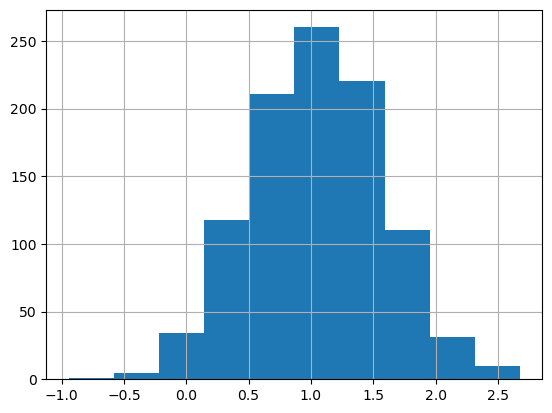

In [177]:
amostra = [data['Net profit'].sample(n=len(data),
           replace=True,
           ignore_index=True) for i in range(0, 1000)
          ]
amostra = pd.DataFrame(amostra).T
amostra.mean().hist()

## Alguns dados amostrais (máximo, mínimo e médio)

In [178]:
ganho_maximo = amostra.sum().max()
perda_maxima = amostra.sum().min()
ganho_medio = amostra.sum().mean()

dado_amostral = pd.DataFrame([ganho_maximo, perda_maxima, ganho_medio],
                       index=['Maior ganho amostral', 'Maior perda amostral', 'Ganho médio amostral'],
                       columns=['U$'])
dado_amostral['U$'] = dado_amostral['U$'].round(2)

In [179]:
media = amostra['Net profit'].sum().mean()
desvio_padrao = amostra['Net profit'].sum().std()
z = norm.ppf(0.975)
e = z * desvio_padrao
n = (z * (desvio_padrao / e)) ** 2
n = int(n.round())
intervalo = norm.interval(alpha = 0.95,
                          loc = media,
                          scale = desvio_padrao / np.sqrt(n))

C:\Users\dduca\AppData\Local\Temp\ipykernel_3972\1292304377.py:7: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  intervalo = norm.interval(alpha = 0.95,


## Plotando o gráfico de Dispersão entre intervalo

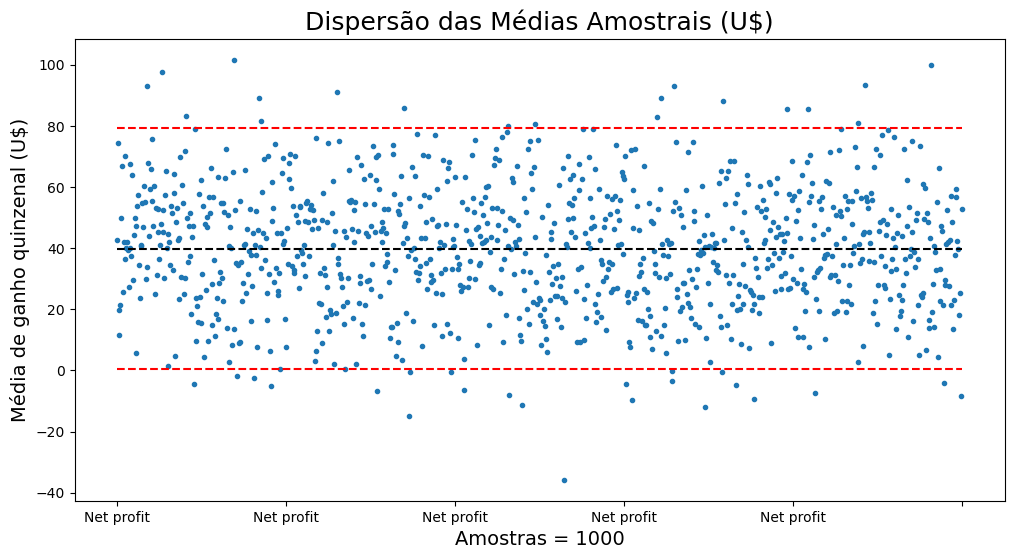

In [180]:
ax = amostra.sum().plot(style = '.')
ax.figure.set_size_inches(12, 6)
ax.set_title('Dispersão das Médias Amostrais (U$)', fontsize=18)
ax.set_ylabel('Média de ganho quinzenal (U$)', fontsize=14)
ax.set_xlabel('Amostras = 1000', fontsize=14)
ax.hlines(y = media, xmin = 0, xmax = 1000, colors='black', linestyles='dashed')
ax.hlines(y = intervalo[0], xmin = 0, xmax = 1000, colors='red', linestyles='dashed')
ax.hlines(y = intervalo[1], xmin = 0, xmax = 1000, colors='red', linestyles='dashed')
ax=ax

In [181]:
# Frequencia por tipo de ordem e rentabilidade
proporcao

,Qtd. Op.,Proporção (%),Lucro (U$)
Op. Vencedoras,26,68.42,72.18
Op. Perdedoras,12,31.58,-32.80
Total,38,100.00,39.38


In [182]:
# Frequencia por tipo de ordem por símbolo e rentabilidade
dados_concatenados

Tipo,Compra,Venda,Total U$,Qtd C,Qtd V,Total,Média U$/op.
Symbol,,,,,,,
EURUSD,-0.74,8.36,7.62,6,3,9,0.85
GBPUSD,2.91,2.81,5.72,2,5,7,0.82
OIL.WTI,3.80,14.90,18.70,4,6,10,1.87
US30,2.43,7.65,10.08,3,3,6,1.68
USDJPY,6.24,-8.98,-2.74,4,2,6,-0.46


In [183]:
# Tabela de indicadores
tabela_indicador

,U$
PayOff,2.20
Expectativa Mat.,2.76


In [184]:
# Tempo em operação
tempo_em_operacao

,Tempo
Máximo,3 days 06:38:34
Mínimo,0 days 00:03:18
Médio,0 days 10:08:29.394736842


In [185]:
# Dados amostrais
dado_amostral

,U$
Maior ganho amostral,101.68
Maior perda amostral,-35.78
Ganho médio amostral,39.82
